# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #change back to size=1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #change back to size=1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    response = requests.get(query_url + city).json()
    #print(query_url + city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        #city_max_temp = (city_max_temp_c * 9/5) +32
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


http://api.openweathermap.org/data/2.5/weather?appid=bc9841ff79cf5247397a2324e9243776&units=metric&q=
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | masuguru
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | ad dawadimi
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | brokopondo
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | keflavik
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | la passe
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | yellowknife
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
#convert date to readable date before storing
#Display sample data
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')

city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,masuguru,-11.3667,38.4167,21.87,98,70,1.15,TZ,2024-04-24
1,edinburgh of the seven seas,-37.0676,-12.3116,15.28,74,59,3.33,SH,2024-04-24
2,tiksi,71.6872,128.8694,-10.00,80,98,3.75,RU,2024-04-24
3,guerrero negro,27.9769,-114.0611,15.80,76,85,7.16,MX,2024-04-24
4,ad dawadimi,24.5077,44.3924,15.64,22,2,2.59,SA,2024-04-24


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,masuguru,-11.3667,38.4167,21.87,98,70,1.15,TZ,2024-04-24
1,edinburgh of the seven seas,-37.0676,-12.3116,15.28,74,59,3.33,SH,2024-04-24
2,tiksi,71.6872,128.8694,-10.00,80,98,3.75,RU,2024-04-24
3,guerrero negro,27.9769,-114.0611,15.80,76,85,7.16,MX,2024-04-24
4,ad dawadimi,24.5077,44.3924,15.64,22,2,2.59,SA,2024-04-24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

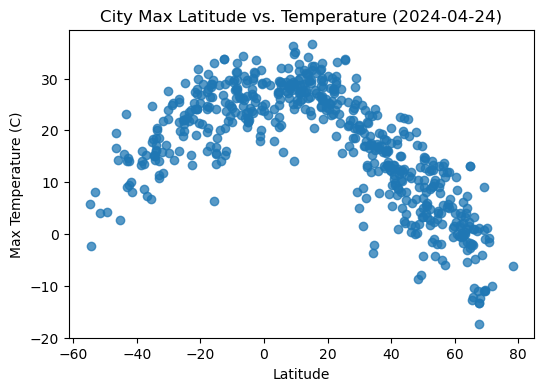

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6,4))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75)
date=city_data_df['Date']
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date[0]})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

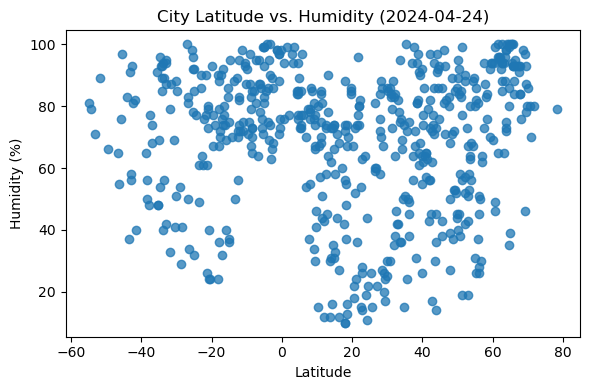

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6,4))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date[0]})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

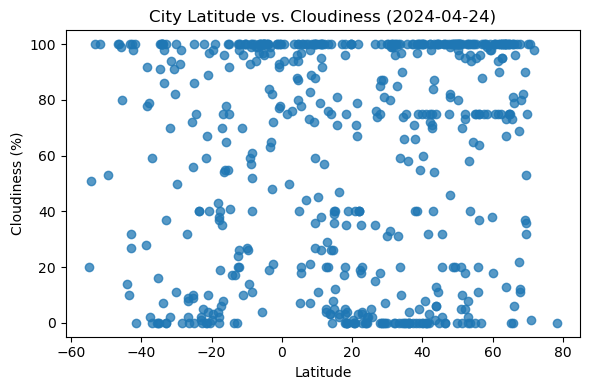

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6,4))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date[0]})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

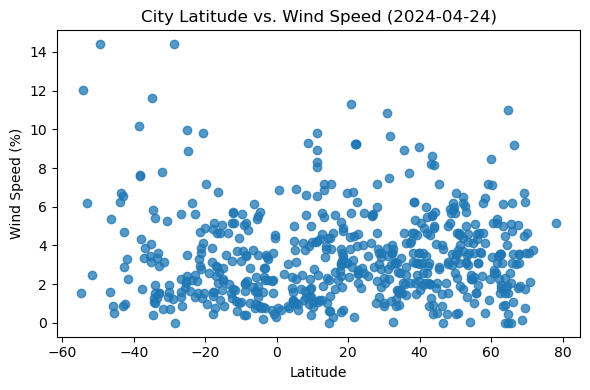

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6,4))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date[0]})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, output_file):
    """
    Function to create a linear regression plot.
    
    Parameters:
        x_values (array-like): The x values for the plot.
        y_values (array-like): The y values for the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.
        output_file (str): The file name to save the plot.
    """
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation and r-value
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {rvalue**2:.2f}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Save the plot
    plt.savefig(output_file)
    
    # Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiksi,71.6872,128.8694,-10.00,80,98,3.75,RU,2024-04-24
3,guerrero negro,27.9769,-114.0611,15.80,76,85,7.16,MX,2024-04-24
4,ad dawadimi,24.5077,44.3924,15.64,22,2,2.59,SA,2024-04-24
6,brokopondo,4.7500,-55.1667,24.99,85,100,4.98,SR,2024-04-24
7,colonia,50.9333,6.9500,5.53,83,20,3.09,DE,2024-04-24


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,masuguru,-11.3667,38.4167,21.87,98,70,1.15,TZ,2024-04-24
1,edinburgh of the seven seas,-37.0676,-12.3116,15.28,74,59,3.33,SH,2024-04-24
5,bredasdorp,-34.5322,20.0403,15.23,96,100,0.38,ZA,2024-04-24
8,port-aux-francais,-49.3500,70.2167,4.32,66,53,14.40,TF,2024-04-24
10,margaret river,-33.9500,115.0667,18.47,40,7,5.43,AU,2024-04-24


###  Temperature vs. Latitude Linear Regression Plot

Correlation coefficient (r-value) between temperature and latitude in the northern hemisphere:, -0.8749088815754192


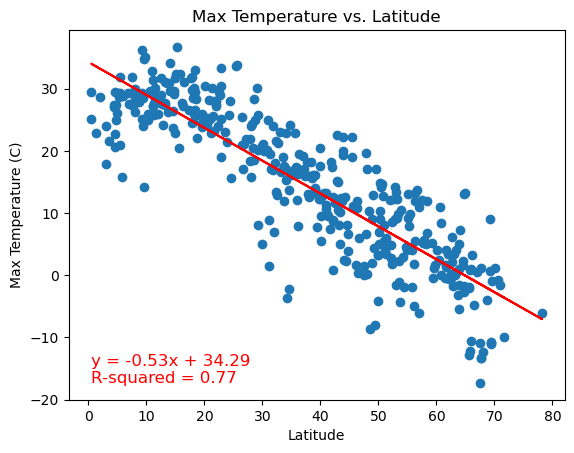

In [33]:
# Linear regression on Northern Hemisphere
city_data_df = pd.DataFrame(northern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
print(f"Correlation coefficient (r-value) between temperature and latitude in the northern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Max Temp'], xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature vs. Latitude', output_file='output_data/Max_Temperature_vs_Latitude_SH.png')



Correlation coefficient (r-value) between temperature and latitude in the southern hemisphere:, 0.6984384116935799


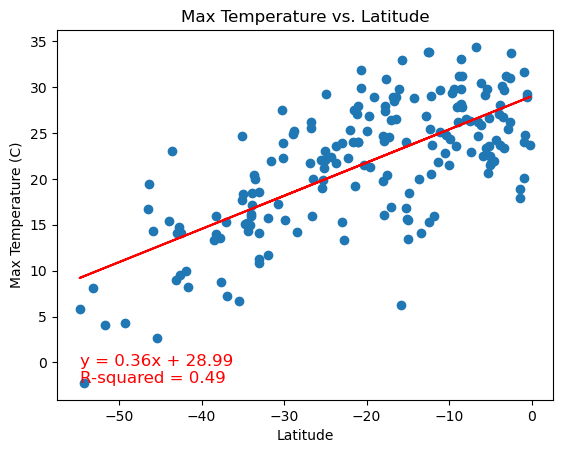

In [34]:
# Linear regression on Southern Hemisphere
city_data_df = pd.DataFrame(southern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
print(f"Correlation coefficient (r-value) between temperature and latitude in the southern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Max Temp'], xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature vs. Latitude', output_file='output_data/Max Temperature_vs_Latitude_NH.png')


**Discussion about the linear relationship:** 
Correlation seen between temperature and latitude very clear both north and south of the equator as you move further from the equator (further than zero), the temperature is higher.

### Humidity vs. Latitude Linear Regression Plot

Correlation coefficient (r-value) between Humidity and latitude in the northern hemisphere:, 0.2382058302292538


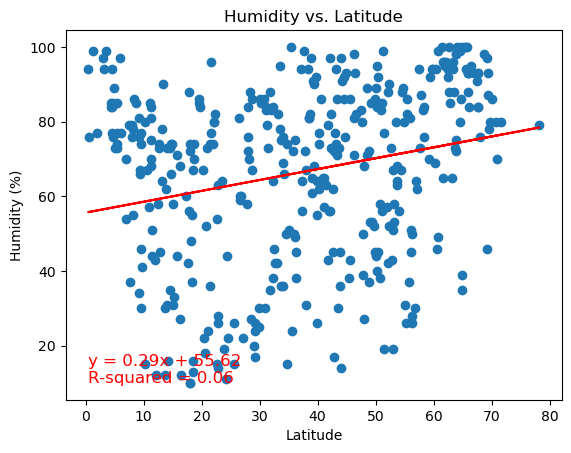

In [35]:
# Northern Hemisphere
city_data_df = pd.DataFrame(northern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Humidity'])
print(f"Correlation coefficient (r-value) between Humidity and latitude in the northern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Humidity'], xlabel='Latitude', ylabel='Humidity (%)', title='Humidity vs. Latitude', output_file='output_data/Humidity_vs_Latitude_NH.png')

Correlation coefficient (r-value) between Humidity and latitude in the souththern hemisphere:, 0.2375412184901004


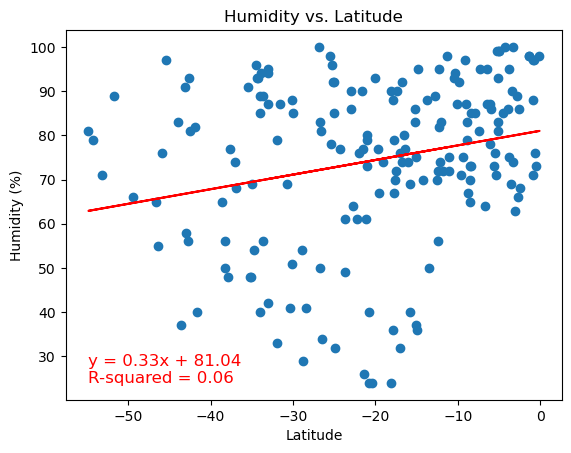

In [36]:
# Southern Hemisphere
city_data_df = pd.DataFrame(southern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Humidity'])
print(f"Correlation coefficient (r-value) between Humidity and latitude in the souththern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Humidity'], xlabel='Latitude', ylabel='Humidity (%)', title='Humidity vs. Latitude', output_file='output_data/Humidity_vs_Latitude_SH.png')

**Discussion about the linear relationship:** 
Data shows that humidity is also correlated to latitude but in this case, it appears to increase from the south pole to the north pole.

### Cloudiness vs. Latitude Linear Regression Plot

Correlation coefficient (r-value) between Cloudiness and latitude in the northern hemisphere:, 0.1480469691175874


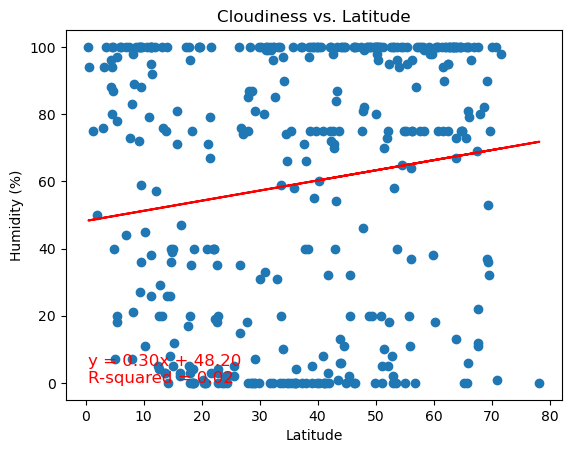

In [32]:
# Northern Hemisphere
city_data_df = pd.DataFrame(northern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Cloudiness'])
print(f"Correlation coefficient (r-value) between Cloudiness and latitude in the northern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Cloudiness'], xlabel='Latitude', ylabel='Humidity (%)', title='Cloudiness vs. Latitude', output_file='output_data/Cloudiness_vs_Latitude_NH.png')

Correlation coefficient (r-value) between Cloudiness and latitude in the southern hemisphere:, 0.19067052506689008


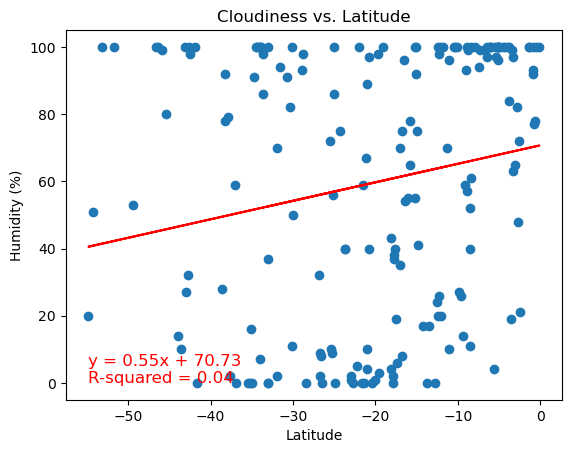

In [31]:
# Southern Hemisphere
city_data_df = pd.DataFrame(southern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Cloudiness'])
print(f"Correlation coefficient (r-value) between Cloudiness and latitude in the southern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Cloudiness'], xlabel='Latitude', ylabel='Humidity (%)', title='Cloudiness vs. Latitude', output_file='output_data/Cloudiness_vs_Latitude_SH.png')

**Discussion about the linear relationship:** 
Plots show that as you move toward the equator in the southern hemisphere, cloud cover increases. Similarly, as you move north of the equator, cloud cover continues to increase.

### Wind Speed vs. Latitude Linear Regression Plot

Correlation coefficient (r-value) between Wind Speed and latitude in the northern hemisphere:, 0.024343115064152217


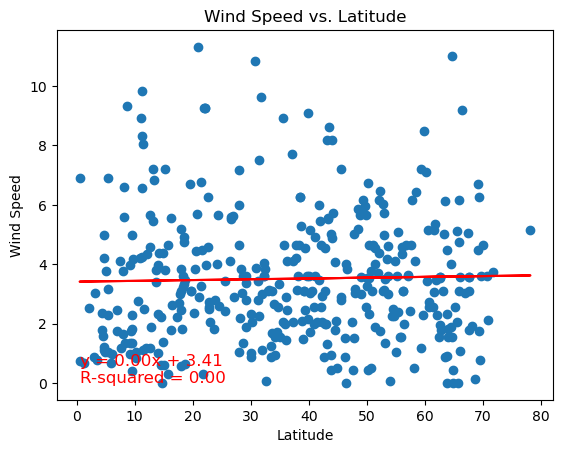

In [30]:
# Northern Hemisphere
city_data_df = pd.DataFrame(northern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])
print(f"Correlation coefficient (r-value) between Wind Speed and latitude in the northern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Wind Speed'], xlabel='Latitude', ylabel='Wind Speed', title='Wind Speed vs. Latitude', output_file='output_data/Wind Speed_vs_Latitude_NH.png')

Correlation coefficient (r-value) between Wind Speed and latitude in the southern hemisphere:, -0.25918079349122863


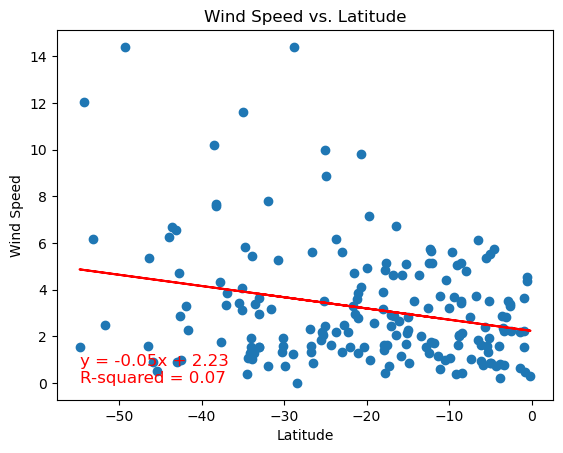

In [29]:
# Southern Hemisphere
city_data_df = pd.DataFrame(southern_hemi_df)
slope, intercept, r_value, p_value, stderr = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])
print(f"Correlation coefficient (r-value) between Wind Speed and latitude in the southern hemisphere:, {r_value}")
plot_linear_regression(city_data_df['Lat'], city_data_df['Wind Speed'], xlabel='Latitude', ylabel='Wind Speed', title='Wind Speed vs. Latitude', output_file='output_data/Wind Speed_vs_Latitude_SH.png')

**Discussion about the linear relationship:** 
Wind speed in the northern hemisphere doesn't seem to have any correlation to latitude. In the southern hemisphere, on the other hand, it is much more wind closer to the pole as compared to the equator.